In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [87]:
df=pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Here the main response variable that needs to be classified is the column 'fetal_health'

In [88]:
df['fetal_health'].unique()

array([2., 1., 3.])

There are 3 major classes,
* Normal depicted as 1.0
* Suspect depicted as 2.0
* Pathological depicted as 3.0

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

Normal
Suspect
Pathological

Features:

* 'baseline value' FHR baseline (beats per minute)
* 'accelerations' Number of accelerations per second
* 'fetal_movement' Number of fetal movements per second
* 'uterine_contractions' Number of uterine contractions per second
* 'light_decelerations' Number of light decelerations per second
* 'severe_decelerations' Number of severe decelerations per second
* 'prolongued_decelerations' Number of prolonged decelerations per second
* 'abnormal_short_term_variability' Percentage of time with abnormal short term variability
* 'mean_value_of_short_term_variability' Mean value of short term variability
* 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability
* 'mean_value_of_long_term_variability' Mean value of long term variability
* 'histogram_width' Width of FHR histogram
* 'histogram_min' Minimum (low frequency) of FHR histogram
* 'histogram_max' Maximum (high frequency) of FHR histogram
* 'histogram_number_of_peaks' Number of histogram peaks
* 'histogram_number_of_zeroes' Number of histogram zeros
* 'histogram_mode' Histogram mode
* 'histogram_mean' Histogram mean
* 'histogram_median' Histogram median
* 'histogram_variance' Histogram variance
* 'histogram_tendency' Histogram tendency

Target:

'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

# Data Cleaning

In [90]:
df.shape

(2126, 22)

In [91]:
# Checking the Data types
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

Seems all the columns here are numeric

In [92]:
# Lets check for any Missing Values

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
baseline value,0,0.0
accelerations,0,0.0
histogram_tendency,0,0.0
histogram_variance,0,0.0
histogram_median,0,0.0
histogram_mean,0,0.0
histogram_mode,0,0.0
histogram_number_of_zeroes,0,0.0
histogram_number_of_peaks,0,0.0
histogram_max,0,0.0


Looks like none of the row has any missing value. That is a good news lets continuw with our analysis

In [93]:
# Lets check if there are any duplicate values in the dataset

df[df.duplicated()]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


Seems we have 13 duplicate rows. Lets remove them

In [94]:
# Removing the Duplicate values

df = df.drop_duplicates(subset = None , keep = 'first', inplace = False)
df.shape

(2113, 22)

# Exploratory Data Analysis

<Axes: xlabel='fetal_health', ylabel='count'>

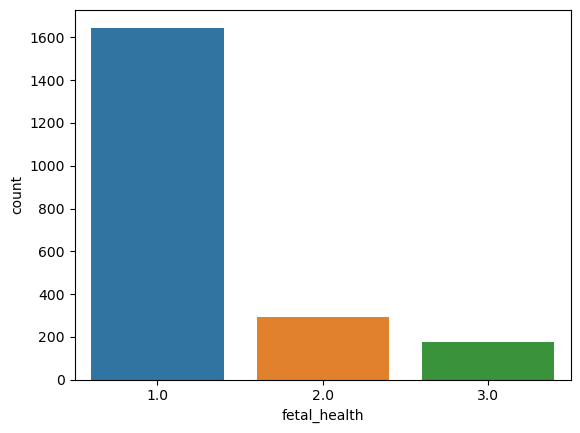

In [95]:
# Exploring the Classes
sns.countplot(data= df, x="fetal_health")

In [96]:
# Exploring the Classes as a Percentile

df['fetal_health'].value_counts(normalize=True)*100

fetal_health
1.0    77.898722
2.0    13.819214
3.0     8.282063
Name: proportion, dtype: float64

We have a Class imbalance. We can see that the classes that are healthy or normal(77.89%) seem to occupy most of the data as they are much common in real life. While the Suspect the pathogenic occupy a very small percentage of the data. 

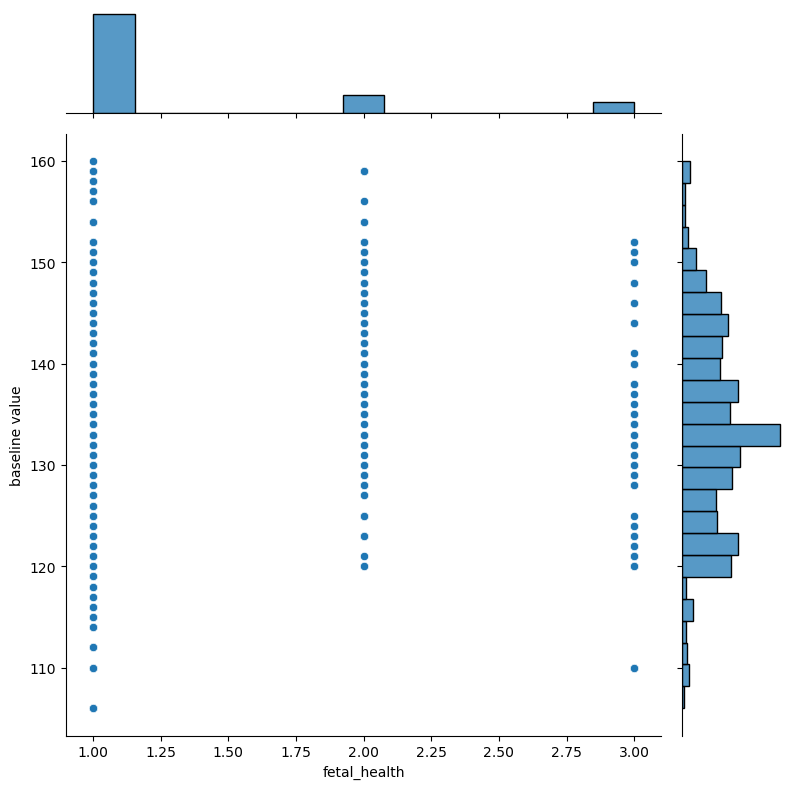

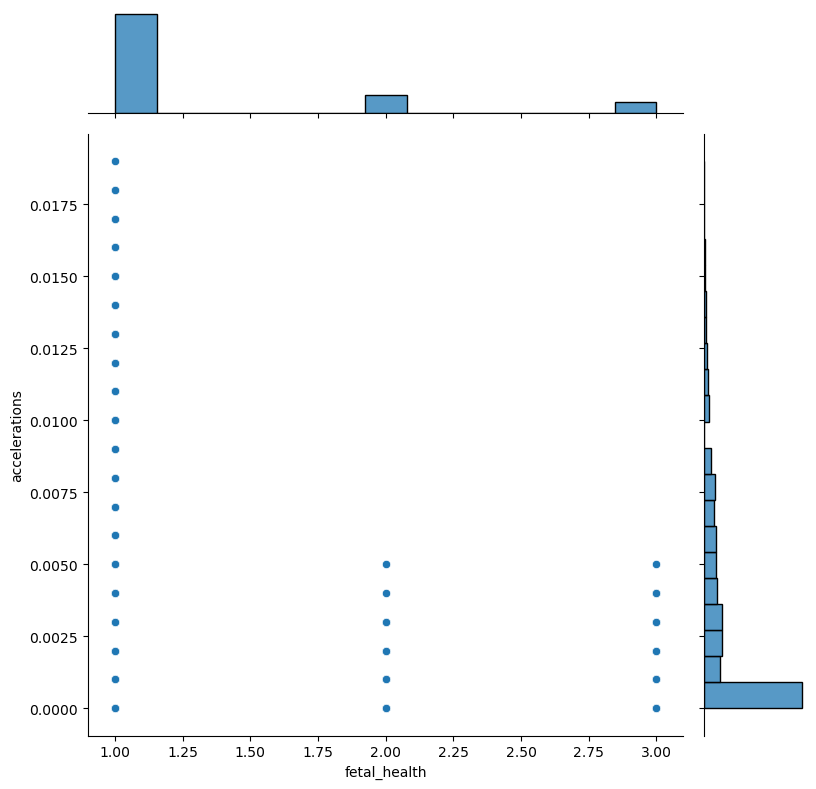

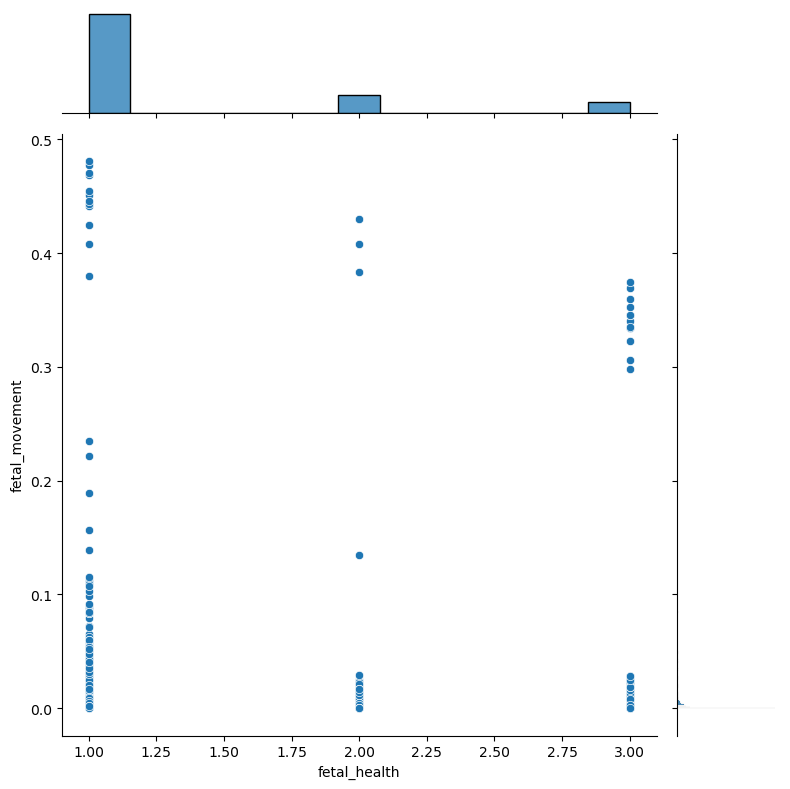

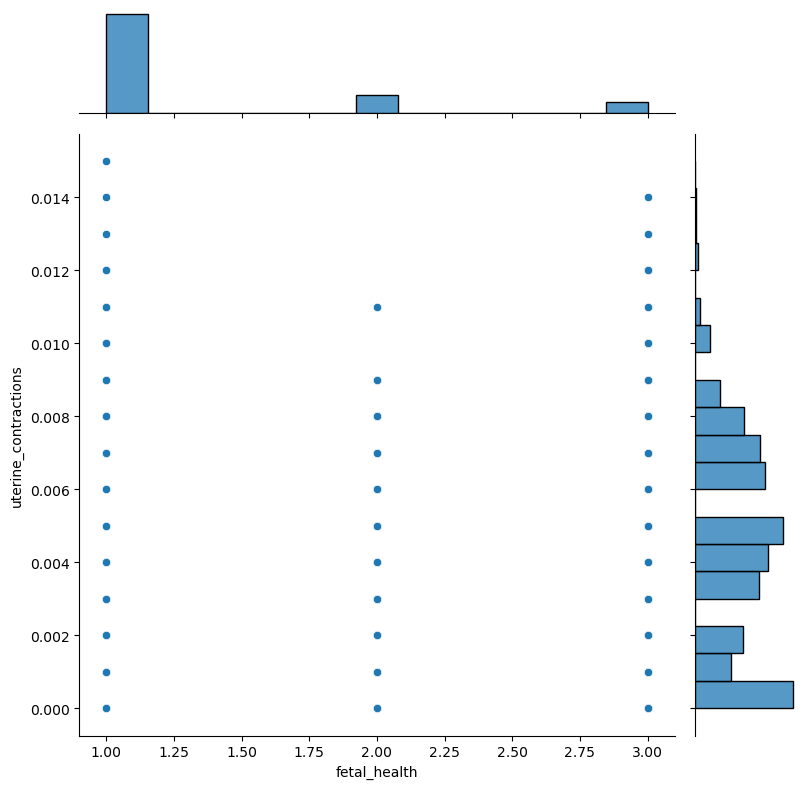

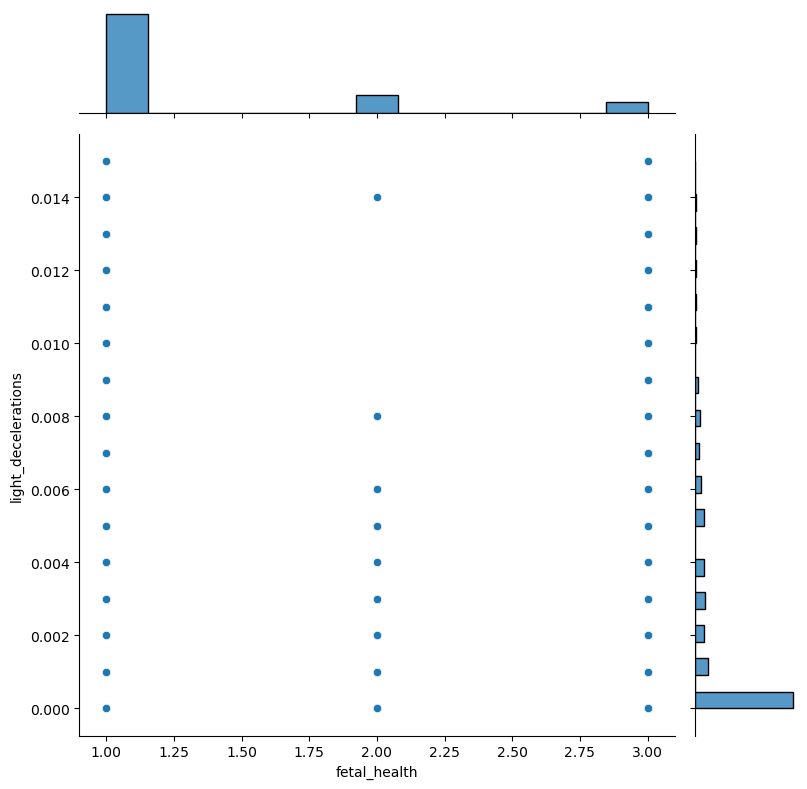

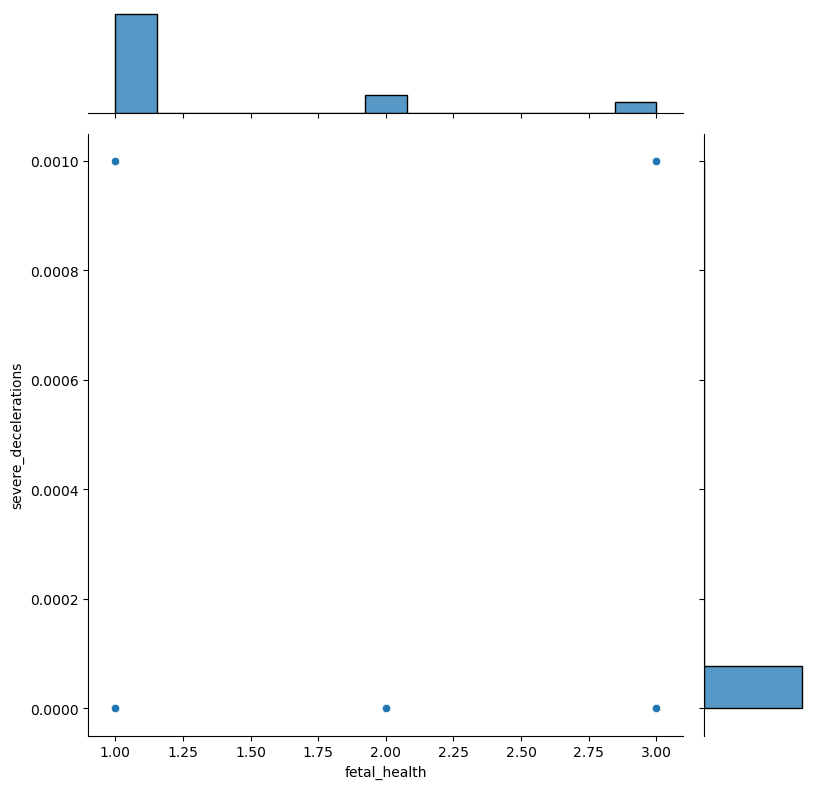

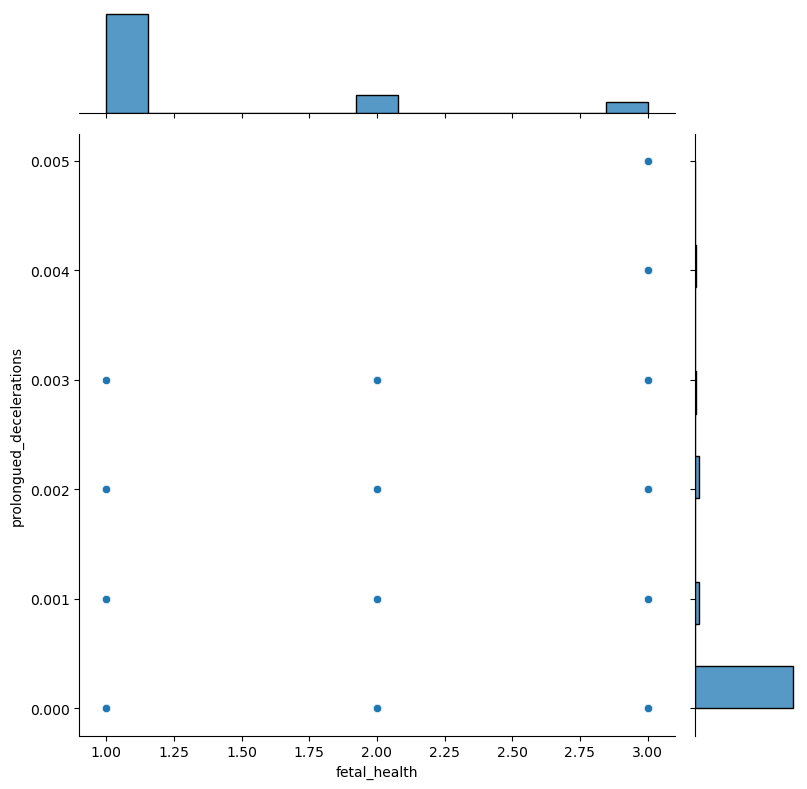

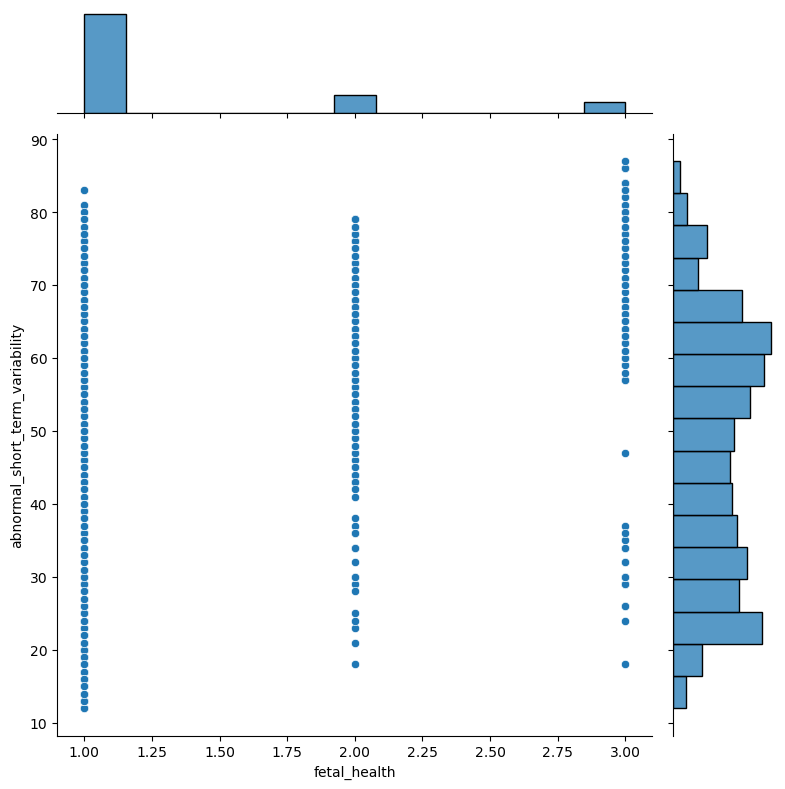

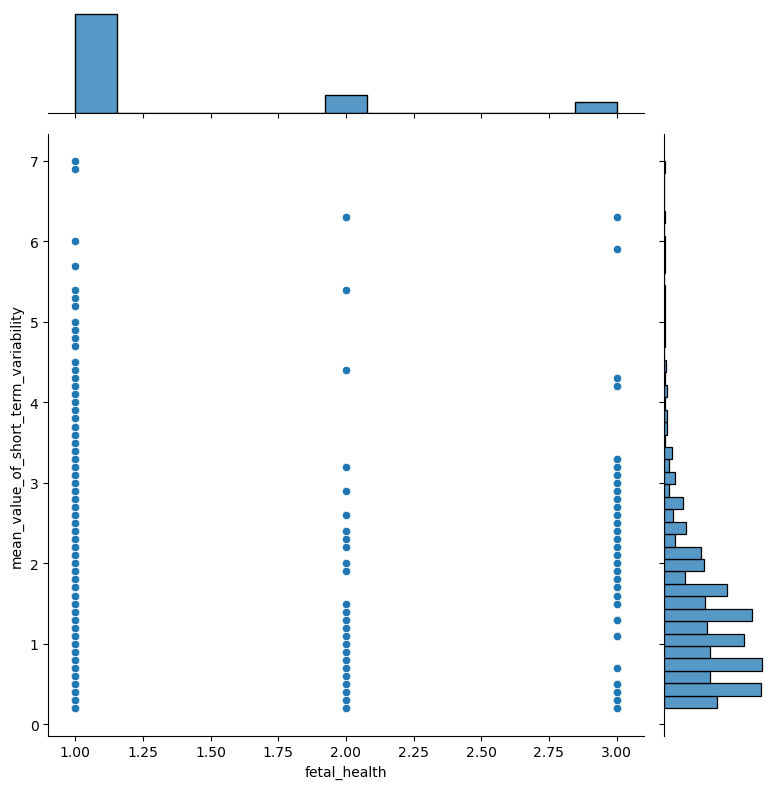

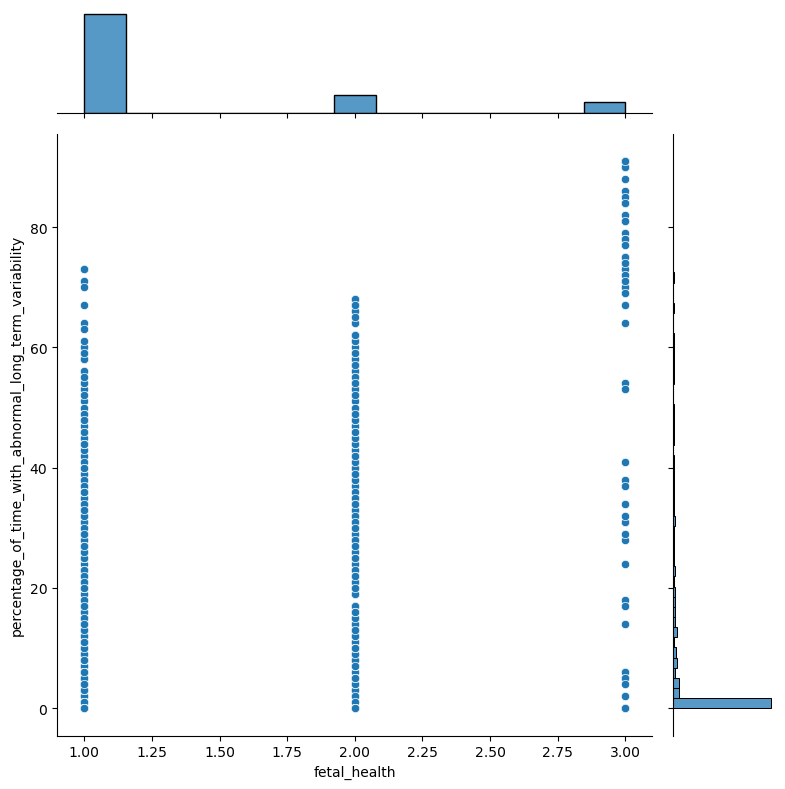

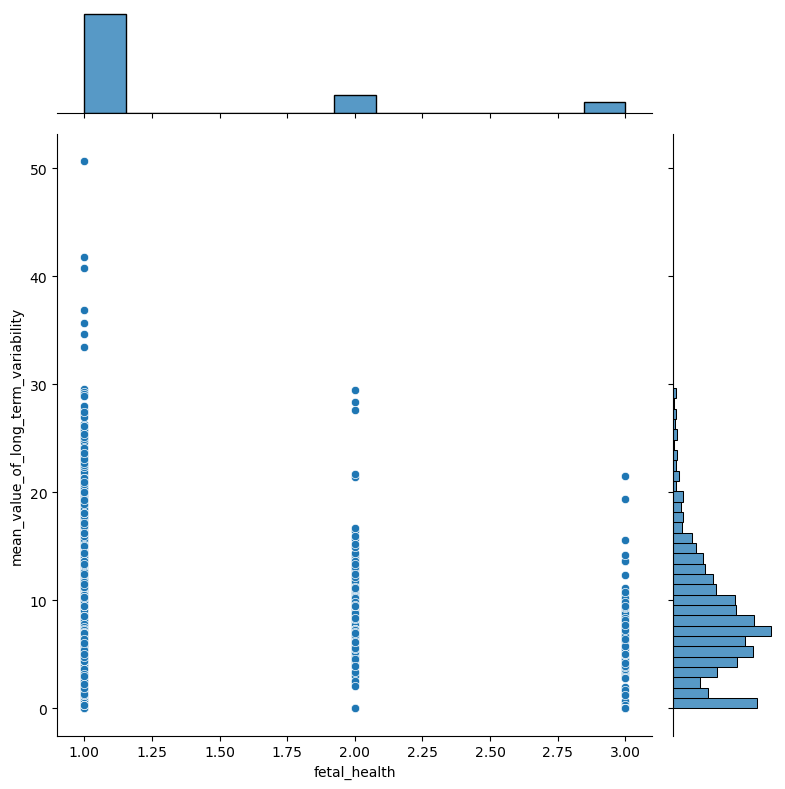

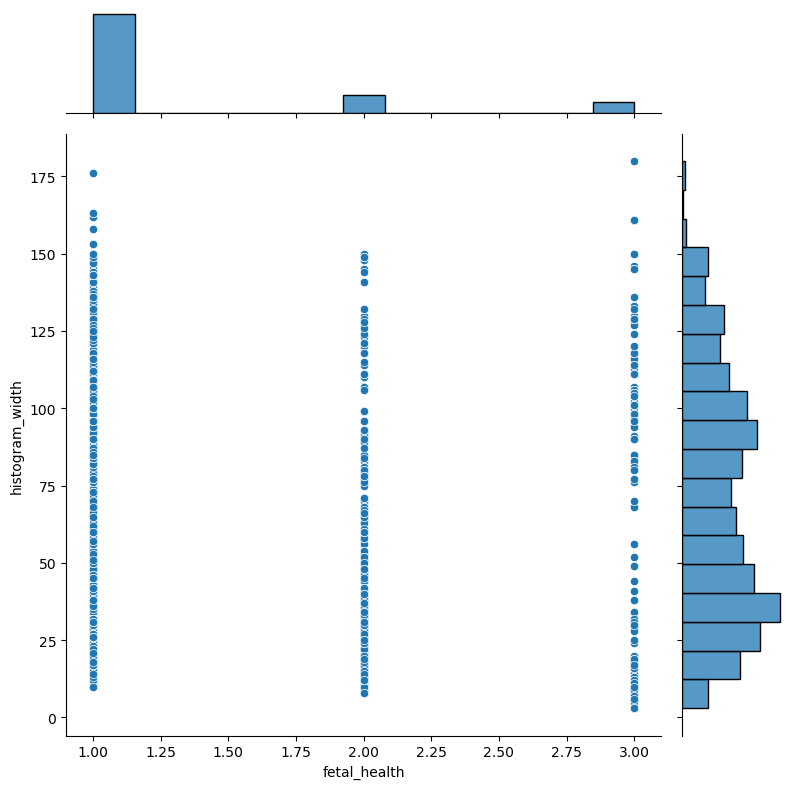

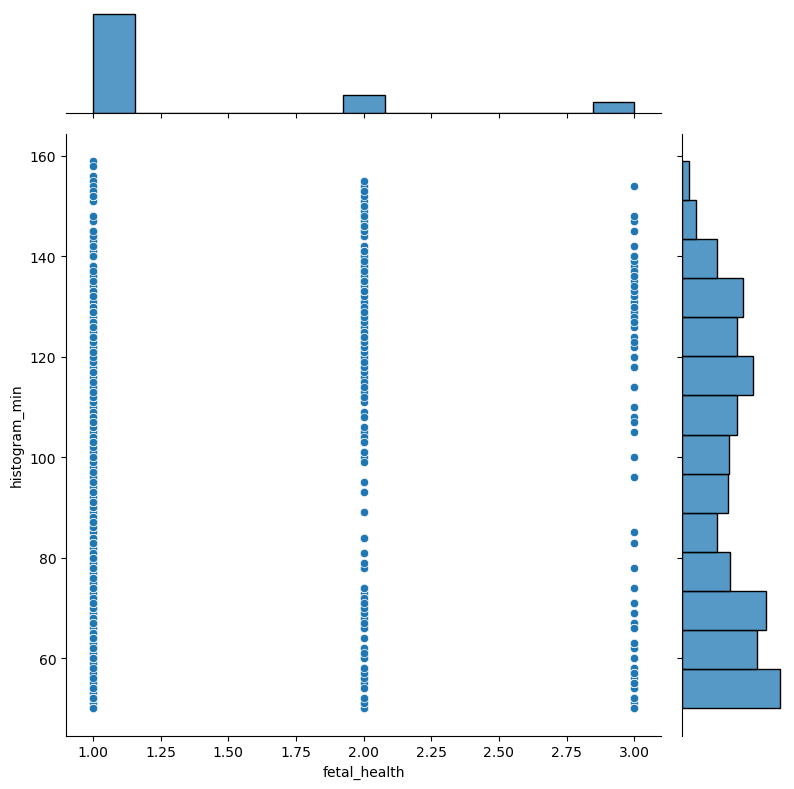

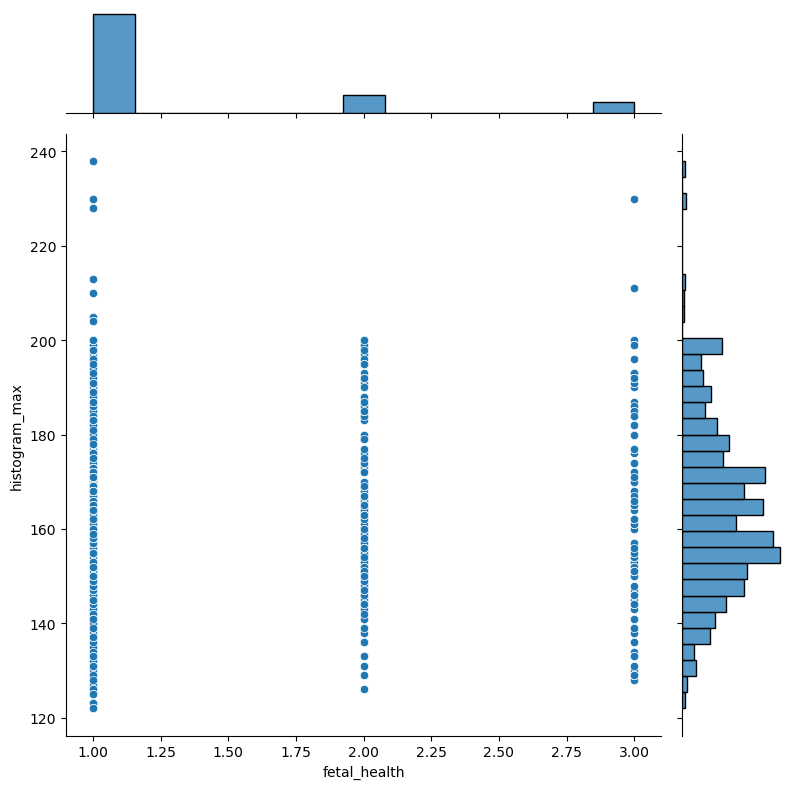

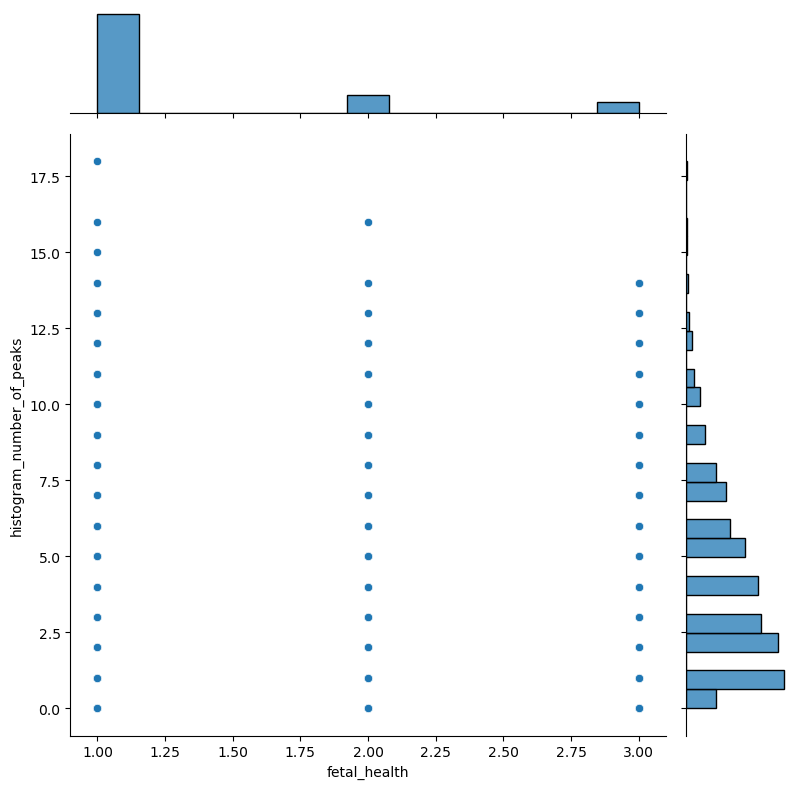

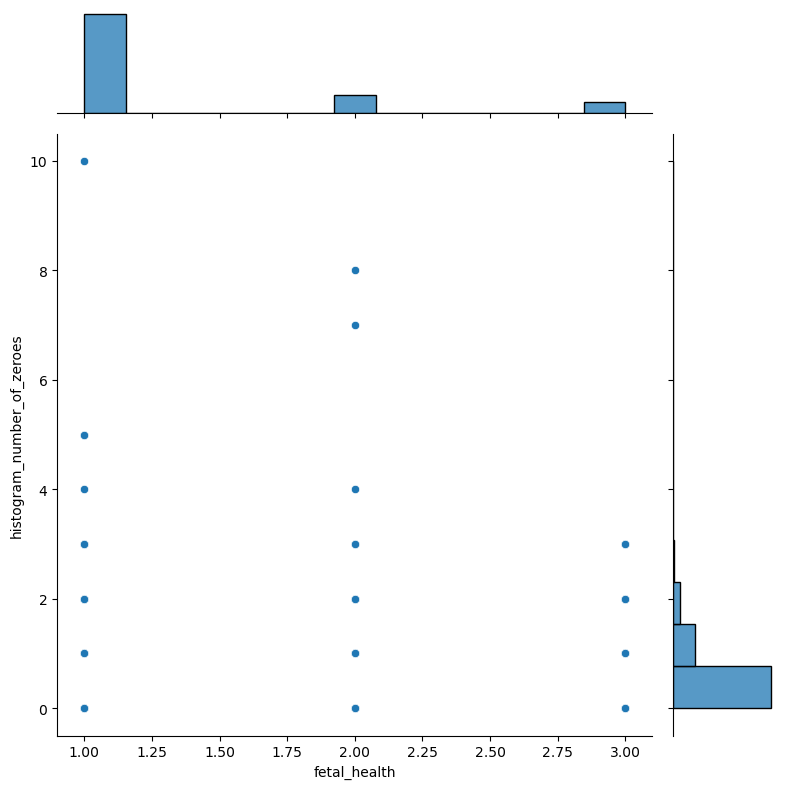

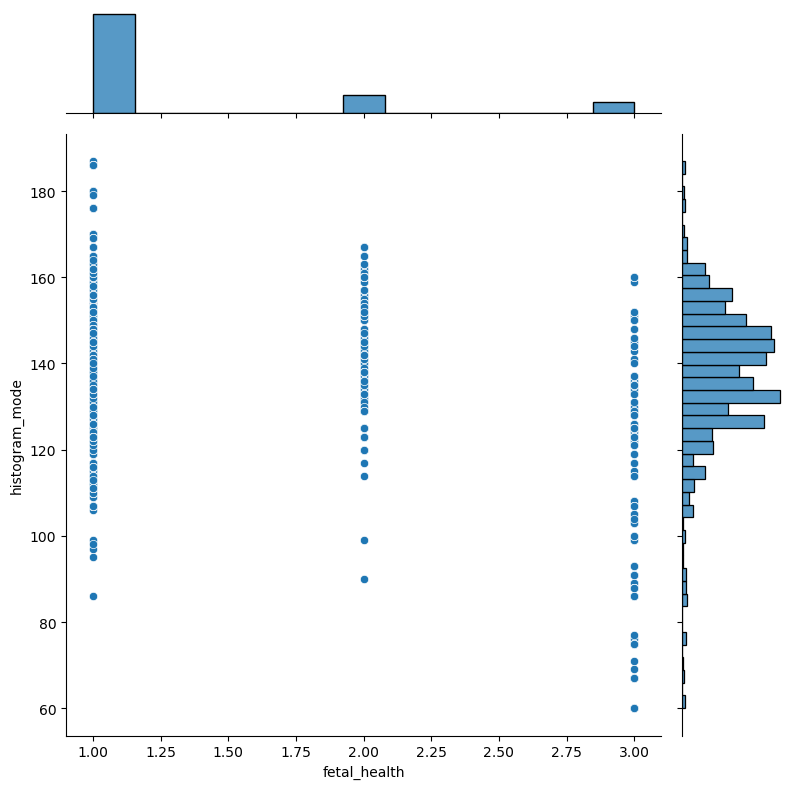

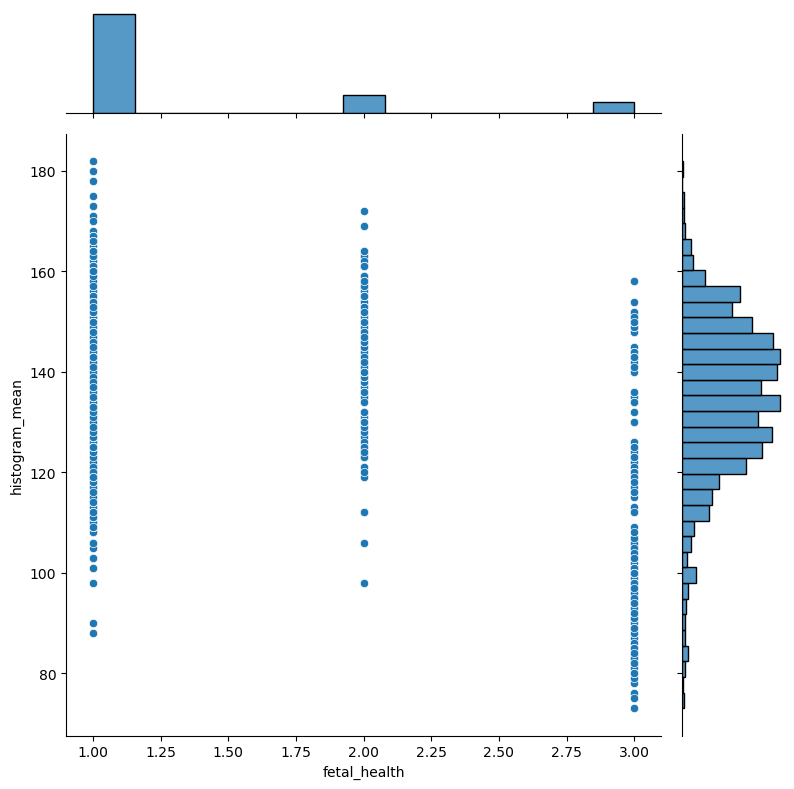

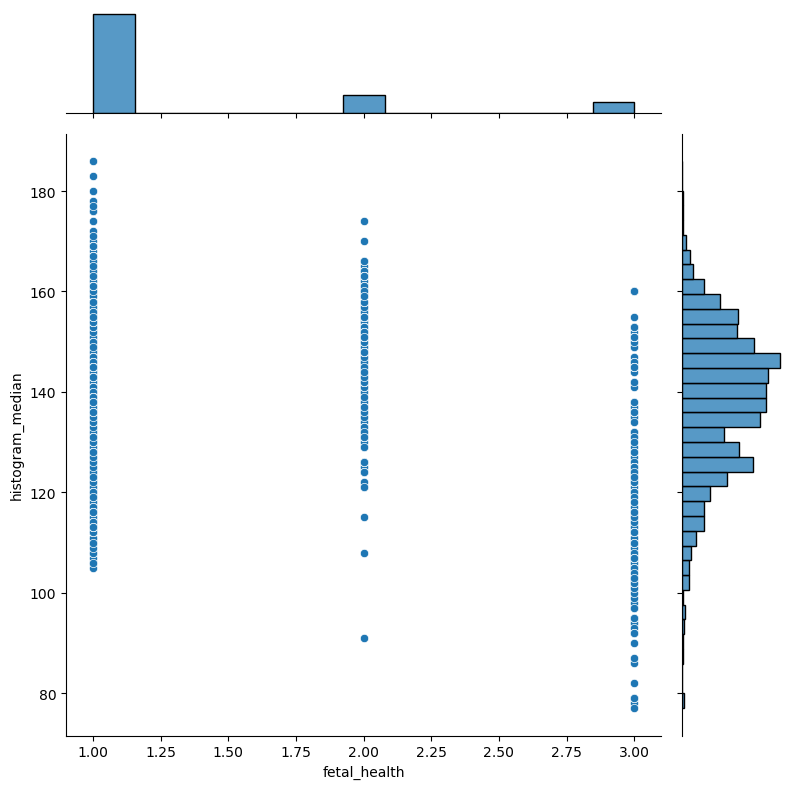

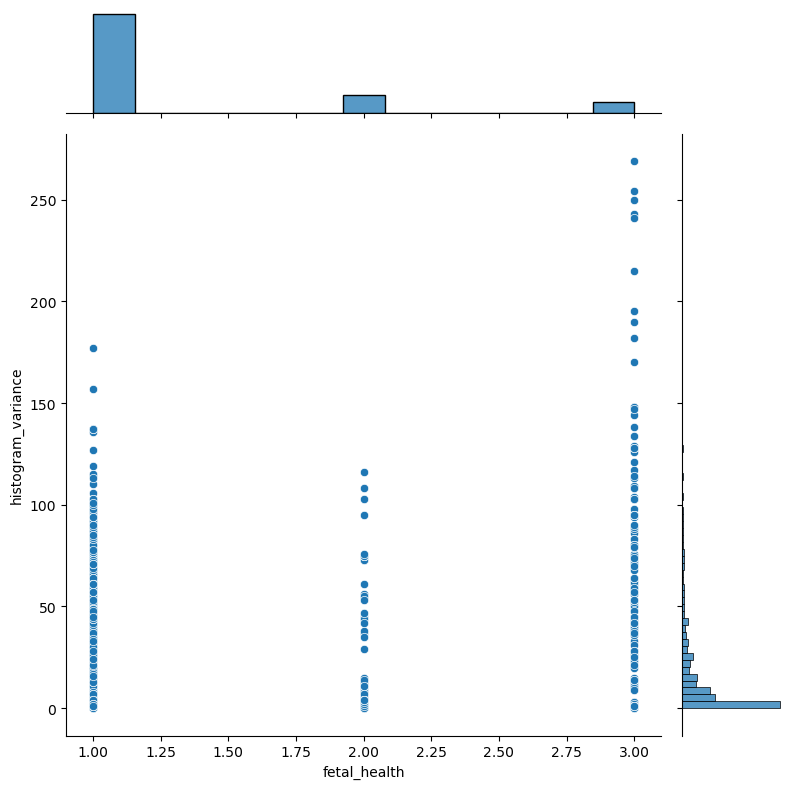

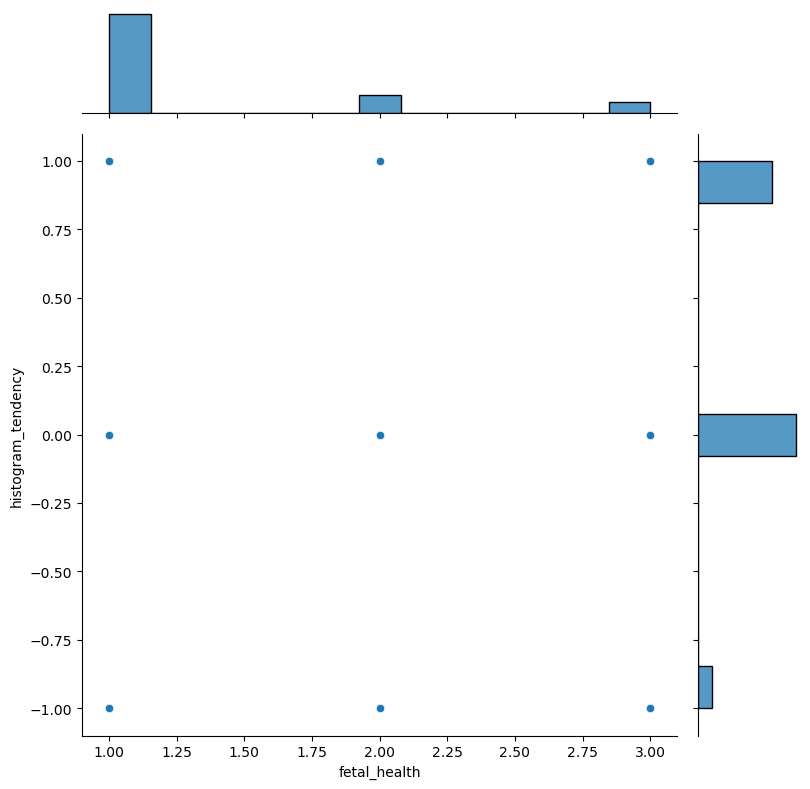

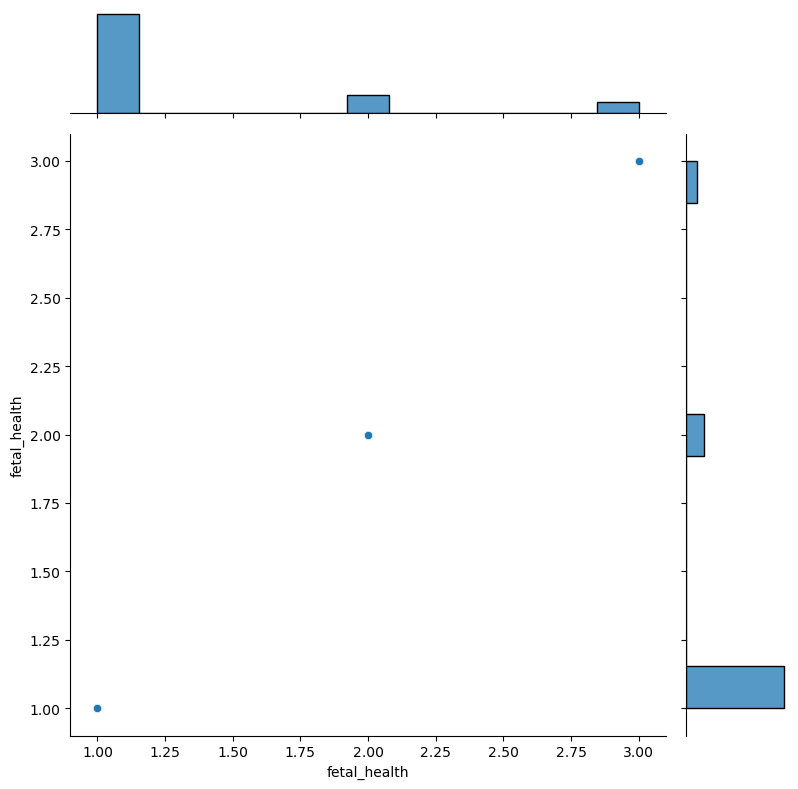

In [97]:
# Outlier Analysis

for i in df.columns.to_list():
    sns.jointplot(x="fetal_health", y=i, data=df, height=8)
    plt.show()


We are seeing some outliers in some of the features. However since this is a medical data observed from a machine, the possibility of errors is very low. Removing them may create a perfect dataset but we want the model to learn those too. So keeping those!!

## Feature Selection

## Correlation matrix

<Axes: >

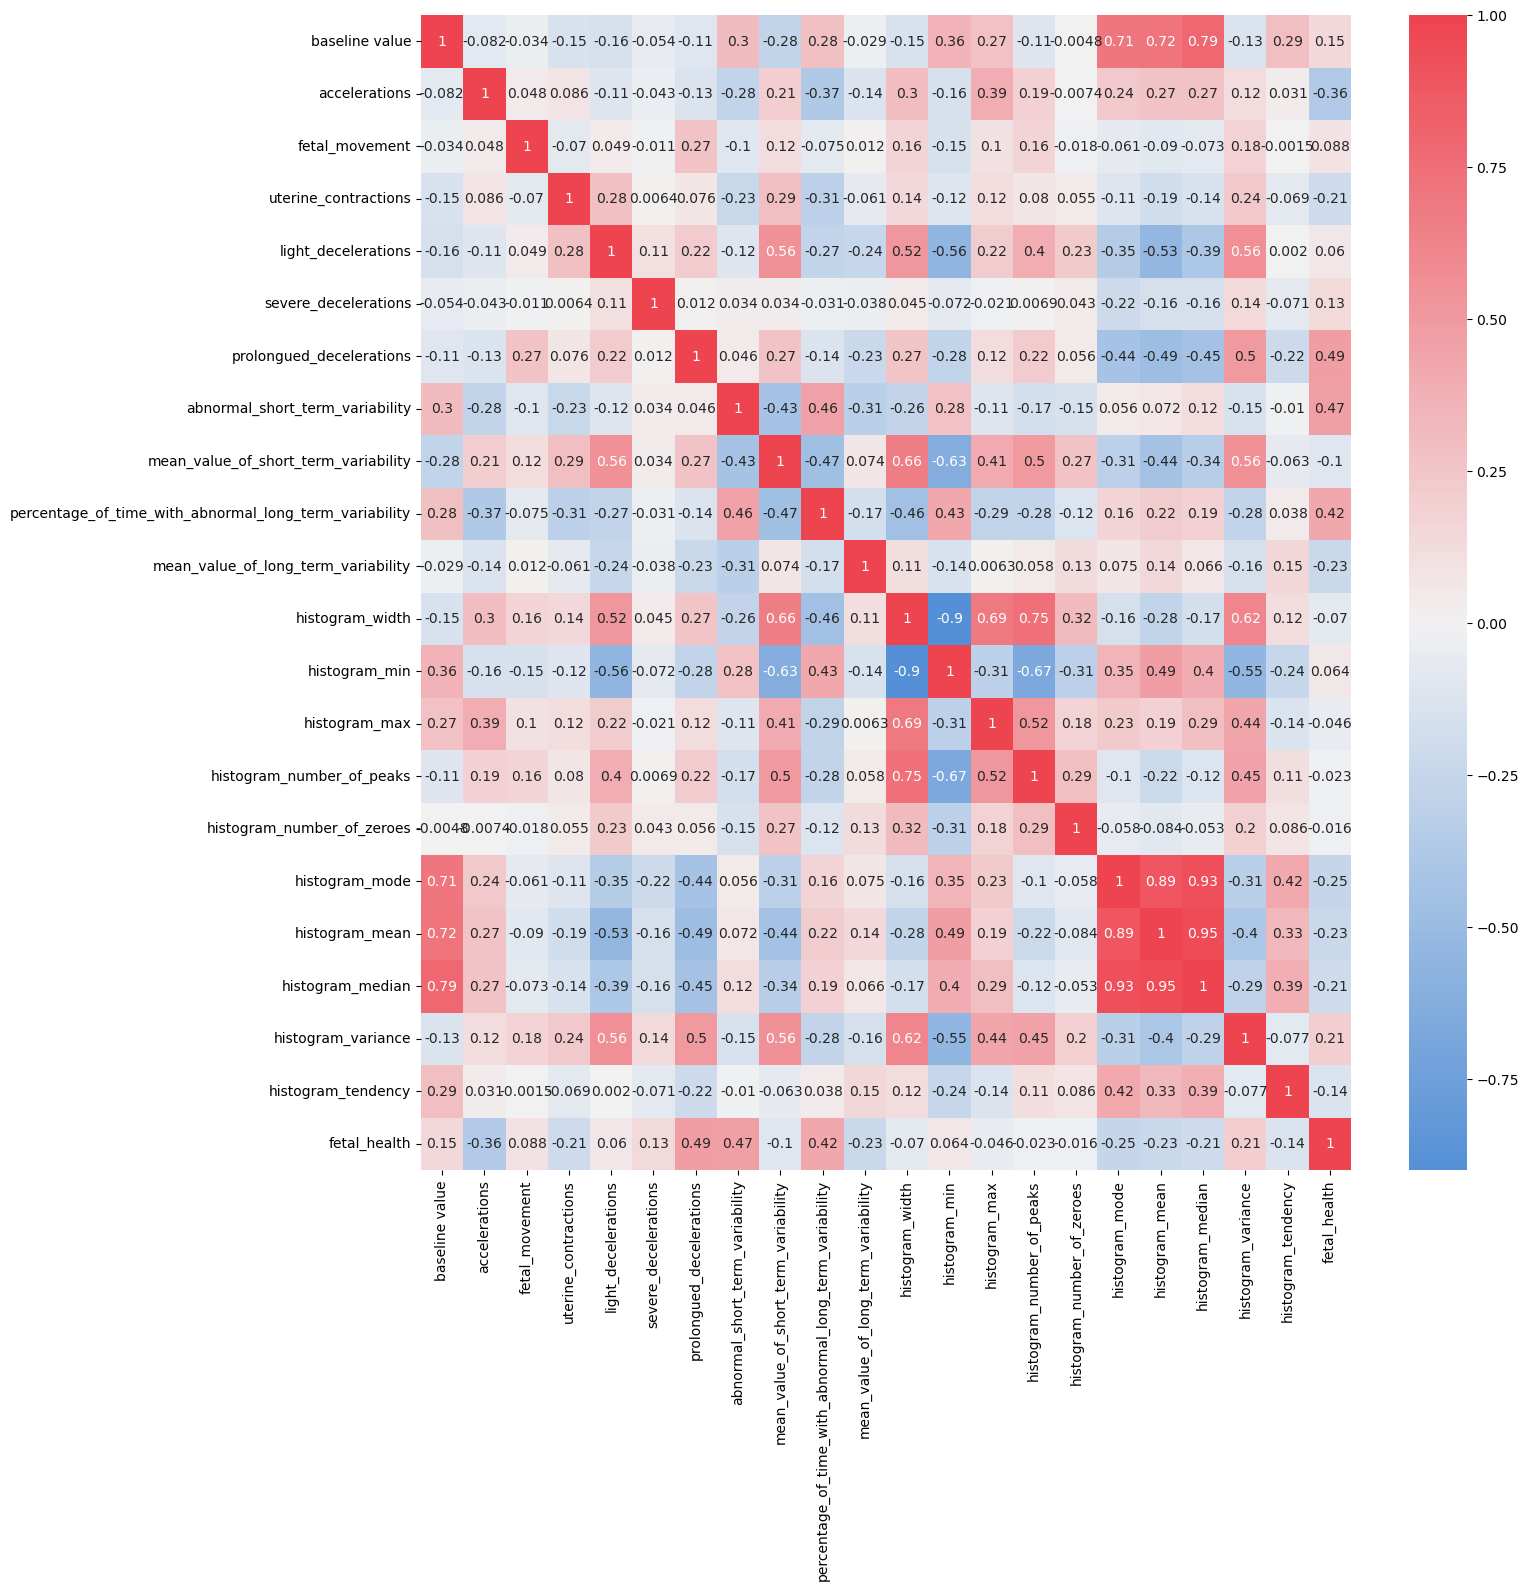

In [98]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

We can see from here that there are variables which are highly correlated with each other. For example, 'historical_median' is highly correlated with 'historical_mode' and 'historical_mean'. So for the model prediction we can use any one of these features as using all would introduce a problem of multi collinearity.

Also, 'histogram_min' and 'histogram_width' are highly negatively correlated. So removing any one of the feature>

In [99]:
df = df.drop(['histogram_min','histogram_median','histogram_mode'], axis=1)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,126.0,2.0,0.0,137.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,198.0,6.0,1.0,136.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,198.0,5.0,1.0,135.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,170.0,11.0,0.0,134.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,170.0,9.0,0.0,136.0,11.0,1.0,1.0


In [100]:
corrmat['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.486752
abnormal_short_term_variability                           0.469671
percentage_of_time_with_abnormal_long_term_variability    0.421634
histogram_variance                                        0.208171
baseline value                                            0.146077
severe_decelerations                                      0.132408
fetal_movement                                            0.088057
histogram_min                                             0.063529
light_decelerations                                       0.059651
histogram_number_of_zeroes                               -0.016376
histogram_number_of_peaks                                -0.022856
histogram_max                                            -0.046480
histogram_width                                          -0.069529
mean_value_of_short_term_variability                     -0.10

## Observation:

We can see the features 
* "prolongued_decelerations"
* "abnormal_short_term_variability"                     
* "percentage_of_time_with_abnormal_long_term_variability"
have a high postive correlation with the fetal_health.


* The feature "accelerations" have a high negative correlation with the fetal_health. 

So these features can be counted as the most important feature to classifiy the fetal health


## 1 way ANOVA 

In [102]:
y = df['fetal_health']
df = df.drop(['fetal_health'], axis=1)

In [104]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=3)
selector.fit(df,y)

cols = selector.get_support(indices=True)
cols

array([6, 7, 9], dtype=int64)

In [105]:
selector.scores_

array([137.83399855, 194.61834456,  11.70071151,  93.64747379,
        66.7503438 ,  28.43883662, 507.30430869, 337.70301995,
       118.05046263, 335.38615649,  69.41893973,  54.21560462,
         2.52335007,  11.72682792,   2.13490091, 298.759569  ,
       150.95582652,  44.8541856 ])

In [106]:
df.iloc[:,cols]

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability
0,0.0,73.0,43.0
1,0.0,17.0,0.0
2,0.0,16.0,0.0
3,0.0,16.0,0.0
4,0.0,16.0,0.0
...,...,...,...
2121,0.0,79.0,25.0
2122,0.0,78.0,22.0
2123,0.0,79.0,20.0
2124,0.0,78.0,27.0


## Observation:

We can see the features 
* "prolongued_decelerations"
* "abnormal_short_term_variability"                     
* "percentage_of_time_with_abnormal_long_term_variability"
have a high scores.

Hence we can say that these features are important in comparison to others.

## Model Building

In [57]:
#assigning values to features as X and target as y
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

In [58]:
#Split the Data to Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=6)

In [59]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.78571429, -0.33333333,  0.        , ..., -1.25      ,
         0.36363636,  0.        ],
       [-0.92857143, -0.33333333,  0.        , ..., -0.8       ,
        -0.22727273,  0.        ],
       [ 0.64285714, -0.33333333,  0.33333333, ...,  0.25      ,
         0.04545455,  1.        ],
       ...,
       [-0.35714286, -0.33333333,  5.33333333, ..., -1.05      ,
         3.        ,  0.        ],
       [ 0.71428571, -0.33333333,  0.        , ...,  0.4       ,
        -0.31818182,  0.        ],
       [ 1.07142857,  0.16666667,  0.        , ...,  1.        ,
        -0.22727273,  1.        ]])

In [113]:
## Libraries for Models

from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Model Building

In [114]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9030732860520094

In [115]:
params = {"tol": [0.0001,0.0002,0.0003],
          "intercept_scaling": [1, 2, 3, 4]
         }

cv_method = StratifiedKFold(n_splits=3)

GridSearchCV_LR = GridSearchCV(estimator=LogisticRegression(), 
                       param_grid=params,
                       cv=cv_method,
                       n_jobs=2,
                       scoring="accuracy"
                      )

GridSearchCV_LR.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=2,
             param_grid={'intercept_scaling': [1, 2, 3, 4],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='accuracy')

In [116]:
best_params_LR = GridSearchCV_LR.best_params_
best_params_LR

{'intercept_scaling': 1, 'tol': 0.0001}

In [117]:
lr = LogisticRegression(C=10, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8959810874704491

Seems the model is already using the best hyperparameters

In [118]:
pred = lr.predict(X_test)

# Classification Report
print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       330
         2.0       0.69      0.69      0.69        58
         3.0       0.81      0.71      0.76        35

    accuracy                           0.90       423
   macro avg       0.81      0.79      0.80       423
weighted avg       0.89      0.90      0.90       423



The accuracy is high but the F1 score for the class 2 and 3 are not great! So lets try out a different model

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

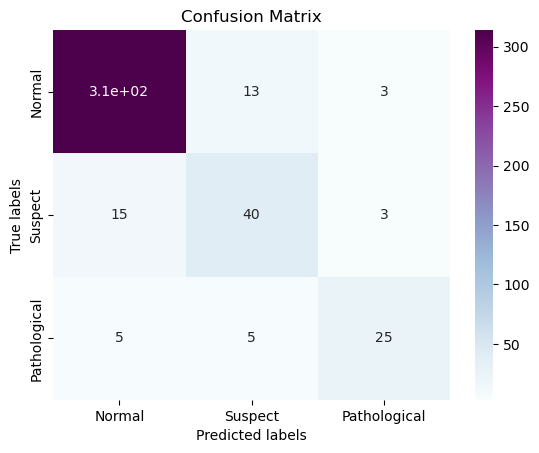

In [120]:
# Confusion Matrix


from sklearn.metrics import confusion_matrix
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

## Random Forest



In [121]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9408983451536643

In [132]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv_method = StratifiedKFold(n_splits=3)

GridSearchCV_RC = GridSearchCV(estimator=RandomForestClassifier(), 
                       param_grid=param_grid,
                       cv=cv_method,
                       n_jobs=2,
                       scoring="accuracy"
                      )

GridSearchCV_RC.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [133]:
best_params_RC = GridSearchCV_RC.best_params_
best_params_RC

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [134]:
rf_classification = RandomForestClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 5,n_estimators= 100, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9527186761229315

In [135]:
pred = rf_model.predict(X_test)

# Classification Report

print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       330
         2.0       0.94      0.78      0.85        58
         3.0       0.94      0.91      0.93        35

    accuracy                           0.95       423
   macro avg       0.94      0.89      0.92       423
weighted avg       0.95      0.95      0.95       423



Now the class 3.0 is better with a F1 score of 0.93 but class 2.0 still can be improved as it is at 0.85. Lets experiment further to see if we could improve them!!

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

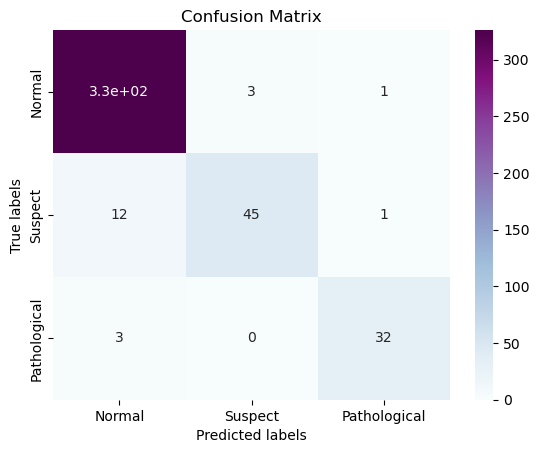

In [136]:
# Confusion Matrix


from sklearn.metrics import confusion_matrix
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

## Gradient Boosting

In [138]:
gbc = GradientBoostingClassifier(random_state=10)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.950354609929078

In [140]:
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


cv_method = StratifiedKFold(n_splits=3)

GridSearchCV_GB = GridSearchCV(estimator=GradientBoostingClassifier(), 
                       param_grid=param_grid,
                       cv=cv_method,
                       n_jobs=2,
                       scoring="accuracy"
                      )

GridSearchCV_GB.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=2,
             param_grid={'max_depth': [3, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 200]},
             scoring='accuracy')

In [141]:
best_params_GB = GridSearchCV_GB.best_params_
best_params_GB

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [142]:
gbc = GradientBoostingClassifier(max_depth= 3, min_samples_leaf= 1, min_samples_split= 2, n_estimators = 200, random_state=10)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.9574468085106383

In [143]:
pred = gbc.predict(X_test)

# Classification Report

print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       330
         2.0       0.92      0.83      0.87        58
         3.0       0.94      0.91      0.93        35

    accuracy                           0.96       423
   macro avg       0.94      0.91      0.92       423
weighted avg       0.96      0.96      0.96       423



The F1 score for class 2 has improved

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

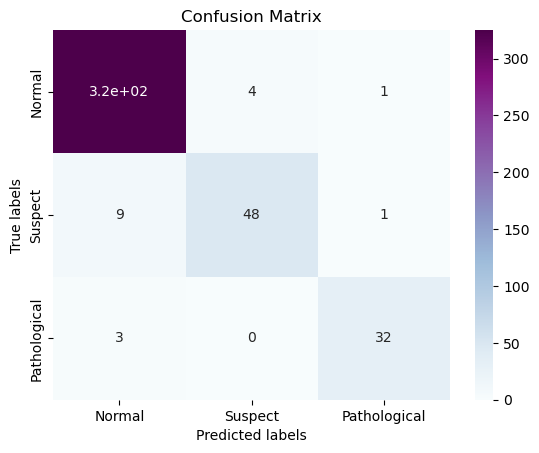

In [144]:
# Confusion Matrix


from sklearn.metrics import confusion_matrix
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

## Model Stacking

In [148]:
estimators = [
    ('rf', RandomForestClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 5,n_estimators= 100, random_state = 10)),
    ('gb', GradientBoostingClassifier(max_depth= 3, min_samples_leaf= 1, min_samples_split= 2, n_estimators = 200, random_state=10))
    ]

In [149]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 5,n_estimators= 100, random_state = 10), cv=5)
clf.fit(X_train, y_train).score(X_test, y_test)

0.9574468085106383

In [150]:
pred = clf.predict(X_test)

# Classification Report

print("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       330
         2.0       0.86      0.88      0.87        58
         3.0       0.97      0.91      0.94        35

    accuracy                           0.96       423
   macro avg       0.94      0.92      0.93       423
weighted avg       0.96      0.96      0.96       423



Model stacking has improved the f1 score for class 3.0, when class 2.0 and class 1.0 remains the same.

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

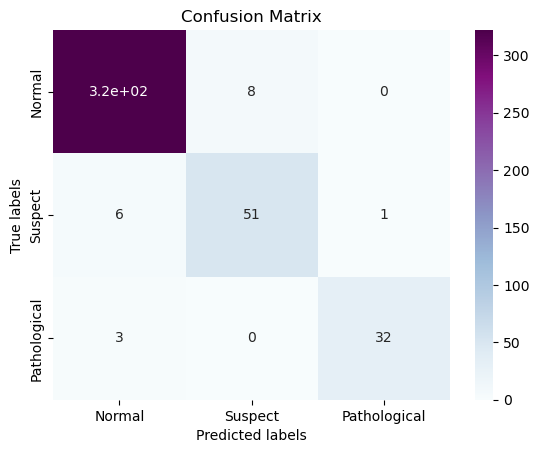

In [151]:
# Confusion Matrix
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu");

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

Model stacking has improved the f1 score for class 3.0, but class 2.0 and class 1.0 remains the same. Hence, model stacking with Random Forest and Gradient Boosting is the best model.

## Result:

During my analysis on the different prediction models that I have used Logistic regression, Random Forest, Gradient Boosting and model stacking we can see a gradual increase in prediction in the subsequent models. Hence, the model with the best performance among these is Model stacking with Random Forest and Gradient Boosting.

In [169]:
#  Presentation of the results obtained from the chosen model.
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 3., 1., 1.,
       3., 1., 1., 1., 1., 3., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 3.,
       1., 1., 1., 3., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 3., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 3., 2., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 1., 1., 3., 1., 2., 1., 1., 2., 1., 2., 1.,
       1., 1., 3., 1., 1., 1., 1., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 3.,
       1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 2., 3., 1., 2., 1., 1., 3., 1., 1., 1., 1.,
       1., 2., 1., 2., 1.